<a href="https://colab.research.google.com/github/Indramawanciputra28/Komputasi-Kuantum/blob/main/QNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantum Neural Network (QNN) for Clasiifier:

In [30]:
pip install qiskit==0.46.1 qiskit-aer qiskit_machine_learning==0.7.2 pylatexenc


In [4]:
pip show qiskit scikit-learn


Name: scikit-learn
Version: 1.6.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
         
         Copyright (c) 2007-2024 The scikit-learn developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are met:
         
         * Redistributions of source code must retain the above copyright notice, this
           list of conditions and the following disclaimer.
         
         * Redistributions in binary form must reproduce the above copyright notice,
           this list of conditions and the following disclaimer in the documentation
           and/or other materials provided with the distribution.
         
         * Neither the name of the copyright holder nor the names of its
           contributors may be used to endorse 

#1. load Dataset (Iris)

In [31]:
import pandas as pd
# Mengimpor pustaka pandas untuk manipulasi data

from sklearn.datasets import load_iris
# Mengimpor fungsi `load_iris` dari scikit-learn untuk memuat dataset Iris

dataset = load_iris()
# Memuat dataset Iris, sebuah dataset yang sering digunakan dalam pembelajaran mesin untuk klasifikasi


In [32]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Membuat DataFrame pandas dari data pada dataset Iris, dengan nama kolom diambil dari atribut `feature_names`

df['target'] = dataset.target
# Menambahkan kolom 'target' ke DataFrame, berisi label target dari dataset Iris

df.head()
# Menampilkan 5 baris pertama dari DataFrame untuk melihat data secara sekilas


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
# Hanya gunakan binary class (0, 1)
import numpy as np  # Mengimpor pustaka numpy untuk manipulasi array

x = dataset.data  # Mengambil fitur dari dataset Iris
y = dataset.target  # Mengambil target (label) dari dataset Iris

indexes = np.array([i for (i, s) in enumerate(y) if (s == 0 or s == 1)])
# Membuat array indeks untuk elemen-elemen pada target yang memiliki label 0 atau 1 (binary class)

x = x[indexes]
# Memilih subset fitur berdasarkan indeks untuk class 0 dan 1

y = 2 * y[indexes] - 1
# Mengonversi label 0 menjadi -1 dan label 1 tetap 1, untuk keperluan algoritma tertentu (misalnya SVM)


#2. Pre-Processing
- EDA (Analisis Statistik, handling outlier, feature selection... dll

In [34]:
# Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# Mengimpor scaler dari scikit-learn untuk normalisasi data:
# - StandardScaler: Menstandarkan data (mean=0, std=1)
# - MinMaxScaler: Menskalakan data ke rentang [0, 1]
# - RobustScaler: Menskalakan data dengan mengurangi sensitivitas terhadap outlier

x = MinMaxScaler().fit_transform(x)
# Menerapkan Min-Max Scaling pada data `x` sehingga semua nilai fitur berada di rentang [0, 1]


In [35]:
# Split train-test set (80:20)
from sklearn.model_selection import train_test_split
# Mengimpor fungsi `train_test_split` untuk membagi data menjadi set pelatihan dan pengujian

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Membagi data:
# - 80% data untuk pelatihan (training set)
# - 20% data untuk pengujian (testing set)
# - `random_state=42` memastikan pembagian data konsisten setiap kali dijalankan


#3.QNN Model

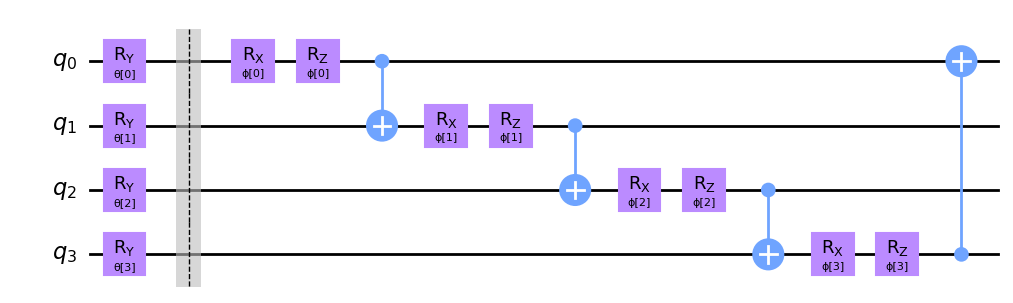

In [36]:
# Arsitektur sirkuit kuantum
import matplotlib.pyplot as plt  # Mengimpor pustaka untuk visualisasi grafik
import qiskit  # Mengimpor Qiskit untuk komputasi kuantum
from qiskit.circuit import QuantumCircuit, ParameterVector
# Mengimpor QuantumCircuit untuk membuat sirkuit kuantum
# Mengimpor ParameterVector untuk mendefinisikan parameter yang dapat disesuaikan dalam sirkuit

num_qubits = 2  # Untuk data PCA 2D
theta = ParameterVector('θ', num_qubits)
phi = ParameterVector('ϕ', num_qubits)
circuit = QuantumCircuit(num_qubits)

# Parameter sirkuit
num_qubits   = x_train.shape[1]  # Menentukan jumlah qubit berdasarkan jumlah fitur data pelatihan
theta        = ParameterVector('θ', num_qubits)  # Membuat vektor parameter theta untuk rotasi
phi          = ParameterVector('ϕ', num_qubits)  # Membuat vektor parameter phi untuk rotasi tambahan
circuit      = QuantumCircuit(num_qubits)  # Membuat sirkuit kuantum dengan jumlah qubit tertentu

# Data Encoding
for i in range(num_qubits):
    circuit.ry(theta[i], i)  # Mengkodekan data dengan rotasi pada sumbu Y (RY) menggunakan parameter theta

circuit.barrier()  # Menambahkan barrier untuk memisahkan bagian sirkuit

# Ansatz
for i in range(num_qubits - 1):
    circuit.rx(phi[i], i)  # Menerapkan rotasi pada sumbu X (RX) menggunakan parameter phi pada qubit ke-i
    circuit.rz(phi[i], i)  # Menerapkan rotasi pada sumbu Z (RZ) menggunakan parameter phi pada qubit ke-i
    circuit.cx(i, i + 1)  # Menerapkan gerbang CNOT antara qubit ke-i (kontrol) dan qubit ke-(i+1) (target)

circuit.rx(phi[num_qubits - 1], num_qubits - 1)
# Menerapkan rotasi RX pada qubit terakhir menggunakan parameter phi

circuit.rz(phi[num_qubits - 1], num_qubits - 1)
# Menerapkan rotasi RZ pada qubit terakhir menggunakan parameter phi

circuit.cx(3, 0)
# Menerapkan gerbang CNOT antara qubit ke-3 (kontrol) dan qubit ke-0 (target)

# Plot sirkuit
circuit.draw(output='mpl', style='clifford')
# Menggambar sirkuit menggunakan matplotlib dengan gaya Clifford


In [37]:
# Kurva pembelajaran
import time  # Mengimpor pustaka time untuk mengukur waktu eksekusi
from IPython.display import clear_output
# Mengimpor fungsi clear_output untuk membersihkan output sel saat menampilkan pembaruan secara interaktif

objective_func_vals = []
# List untuk menyimpan nilai fungsi objektif selama proses pembelajaran

def callback_graph(weights, obj_func_eval):
    # Fungsi callback untuk memantau nilai fungsi objektif pada setiap iterasi
    clear_output(wait=True)  # Membersihkan output sebelumnya
    objective_func_vals.append(obj_func_eval)
    # Menambahkan nilai fungsi objektif ke dalam list `objective_func_vals`
    plt.title("Objective function value against iteration")
    # Menambahkan judul grafik
    plt.xlabel("Iteration")  # Menambahkan label sumbu x
    plt.ylabel("Objective function value")  # Menambahkan label sumbu y
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    # Membuat grafik nilai fungsi objektif terhadap iterasi
    plt.show()  # Menampilkan grafik


In [38]:
# Kurva pembelajaran
import time  # Mengimpor pustaka time untuk mengukur waktu eksekusi
from IPython.display import clear_output
# Mengimpor fungsi clear_output untuk membersihkan output sel saat menampilkan pembaruan secara interaktif

objective_func_vals = []
# List untuk menyimpan nilai fungsi objektif selama proses pembelajaran

def callback_graph(weights, obj_func_eval):
    # Fungsi callback untuk memantau nilai fungsi objektif pada setiap iterasi
    clear_output(wait=True)  # Membersihkan output sebelumnya
    objective_func_vals.append(obj_func_eval)
    # Menambahkan nilai fungsi objektif ke dalam list `objective_func_vals`
    plt.title("Objective function value against iteration")
    # Menambahkan judul grafik
    plt.xlabel("Iteration")  # Menambahkan label sumbu x
    plt.ylabel("Objective function value")  # Menambahkan label sumbu y
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    # Membuat grafik nilai fungsi objektif terhadap iterasi
    plt.show()  # Menampilkan grafik


In [39]:
# Classifier
from qiskit import Aer
# Mengimpor Aer untuk simulasi backend

from qiskit.circuit import QuantumCircuit, ParameterVector
# Mengimpor QuantumCircuit untuk membuat sirkuit kuantum dan ParameterVector untuk parameterisasi

from qiskit.utils import QuantumInstance
# QuantumInstance untuk mengelola backend kuantum

from qiskit.opflow import PauliSumOp, StateFn
# PauliSumOp untuk mendefinisikan operator observasi dan StateFn untuk merepresentasikan fungsi status

from qiskit.algorithms.optimizers import COBYLA, ADAM, QNSPSA, AQGD
# Mengimpor optimizer untuk melatih model kuantum

from qiskit_machine_learning.neural_networks import EstimatorQNN
# Mengimpor EstimatorQNN, implementasi jaringan neural berbasis kuantum

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
# Mengimpor NeuralNetworkClassifier untuk klasifikasi berbasis jaringan neural kuantum

# Backend setup
backend = Aer.get_backend('qasm_simulator')
# Menggunakan simulator QASM sebagai backend

quantum_instance = QuantumInstance(backend)
# Membuat instance kuantum dengan backend

# Observable setup
observable = PauliSumOp.from_list([("XYZX", 1.0)])
# Mendefinisikan observabel berbasis operator Pauli

# Optimizer setup
optimizer = COBYLA(maxiter=100)
# Menggunakan optimizer COBYLA dengan iterasi maksimum 100

# Quantum neural network (QNN) setup
qnn_expectation = StateFn(observable, is_measurement=True) @ StateFn(circuit)
# Mengatur ekspektasi QNN berdasarkan observabel dan sirkuit

estimator_qnn = EstimatorQNN(
    circuit=circuit,  # Sirkuit kuantum
    observables=observable,  # Observabel yang diukur
    input_params=theta,  # Parameter input (theta)
    weight_params=phi  # Parameter bobot (phi)
)

# Neural network classifier setup
qnn = NeuralNetworkClassifier(
    estimator_qnn,  # Estimator QNN
    optimizer=optimizer,  # Optimizer untuk pelatihan
    loss='squared_error',  # Fungsi kerugian
    callback=callback_graph  # Callback untuk memantau pembelajaran
)


<ipython-input-39-36f27790d51d>:27: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend)
<ipython-input-39-36f27790d51d>:39: DeprecationWarning: The class ``qiskit.opflow.state_fns.operator_state_fn.OperatorStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/opflow_migration.
  qnn_expectation = StateFn(observable, is_measurement=True) @ StateFn(circuit)
<ipython-input-39-36f27790d51d>:39: DeprecationWarning: The class ``qiskit.opflow.state_fns.circuit_state_fn.CircuitStateFn`` is deprecated as of qiskit-terra 0.24.0. It will be removed in the Qiskit 1.0 release. For code migration guidelines, visit https://qisk.it/opflow_migration.
  qnn_expectation = StateFn(observ

#4.Training

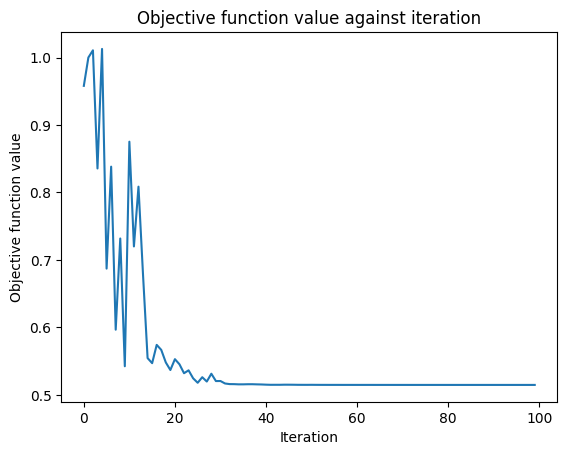

Training time: 0 seconds


In [40]:
qnn.fit(x_train, y_train)
# Melatih jaringan neural kuantum (QNN) dengan data pelatihan (x_train, y_train)

start = time.time()
# Mencatat waktu mulai pelatihan

elapsed = time.time() - start
# Menghitung waktu yang berlalu selama pelatihan

print(f"Training time: {round(elapsed)} seconds")
# Menampilkan waktu pelatihan dalam detik


In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
# Mengimpor metrik evaluasi untuk klasifikasi, termasuk matriks kebingungan, ROC curve, dan AUC

from sklearn.metrics import classification_report
# Mengimpor laporan klasifikasi untuk meringkas hasil evaluasi

y_pred_train = qnn.predict(x_train)
# Membuat prediksi pada data pelatihan

y_pred_test = qnn.predict(x_test)
# Membuat prediksi pada data pengujian

print('TRAINING:')
# Menampilkan hasil evaluasi untuk data pelatihan
print(classification_report(y_train, y_pred_train))
# Menampilkan laporan klasifikasi untuk data pelatihan

print('TESTING:')
# Menampilkan hasil evaluasi untuk data pengujian
print(classification_report(y_test, y_pred_test))
# Menampilkan laporan klasifikasi untuk data pengujian


TRAINING:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

TESTING:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



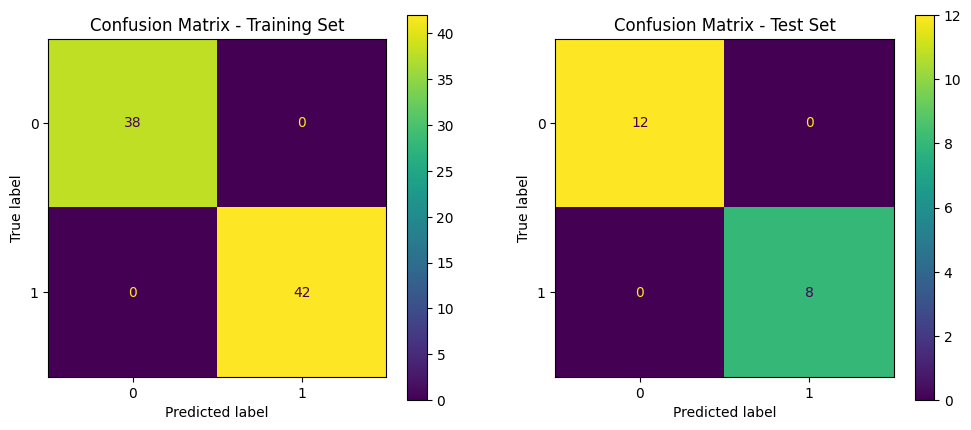

In [42]:
# Confusion matrix
cm_tr = confusion_matrix(y_train, y_pred_train)
# Membuat confusion matrix untuk data pelatihan

disp_tr = ConfusionMatrixDisplay(confusion_matrix=cm_tr)
# Membuat objek untuk menampilkan confusion matrix pada data pelatihan

cm_ts = confusion_matrix(y_test, y_pred_test)
# Membuat confusion matrix untuk data pengujian

disp_ts = ConfusionMatrixDisplay(confusion_matrix=cm_ts)
# Membuat objek untuk menampilkan confusion matrix pada data pengujian

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Membuat subplot dengan 2 grafik dalam satu baris dan ukuran figur 12x5

disp_tr.plot(ax=ax[0])
# Menampilkan confusion matrix untuk data pelatihan pada subplot pertama
ax[0].set_title('Confusion Matrix - Training Set')
# Memberi judul pada subplot pertama

disp_ts.plot(ax=ax[1])
# Menampilkan confusion matrix untuk data pengujian pada subplot kedua
ax[1].set_title('Confusion Matrix - Test Set')
# Memberi judul pada subplot kedua

plt.show()
# Menampilkan semua grafik


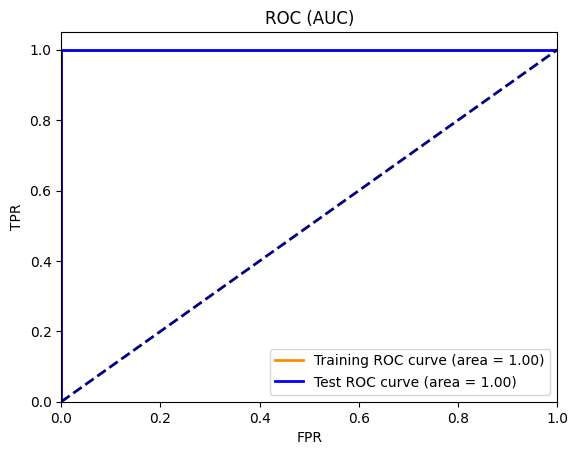

In [45]:
# Kurva ROC (AUC)
fpr_tr, tpr_tr, _ = roc_curve(y_train, y_pred_train)  # FPR dan TPR untuk data pelatihan
roc_auc_tr = auc(fpr_tr, tpr_tr)  # AUC untuk data pelatihan

fpr_ts, tpr_ts, _ = roc_curve(y_test, y_pred_test)  # FPR dan TPR untuk data pengujian
roc_auc_ts = auc(fpr_ts, tpr_ts)  # AUC untuk data pengujian

plt.figure()  # Membuat figur baru untuk plotting

# Plot ROC untuk data pelatihan
plt.plot(fpr_tr, tpr_tr, color='darkorange', lw=2,
         label=f'Training ROC curve (area = {roc_auc_tr:.2f})')

# Plot ROC untuk data pengujian
plt.plot(fpr_ts, tpr_ts, color='blue', lw=2,
         label=f'Test ROC curve (area = {roc_auc_ts:.2f})')

# Garis diagonal sebagai baseline (ROC random)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Menentukan batas sumbu
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Menambahkan label dan judul
plt.xlabel('FPR')  # False Positive Rate
plt.ylabel('TPR')  # True Positive Rate
plt.title('ROC (AUC)')

# Menambahkan legenda
plt.legend(loc="lower right")

# Menampilkan plot
plt.show()
